# Problem statement: 

Given a time-based dataset of a particular domain for a period of one month for an hourly interval, You need to build machine learning and forecast using time series algorithm or any machine learning algorithm which accepts the sequential data as input. You are about to forecast for the next 2 days for each network element(ne_id) given in the dataset.


### About the Dataset:

It contains the KPI (Key Performance Indicator) level data of a particular telecom domain for a period of a month. Value column in the dataset the target variable which needs to need to be forecasted using the DateTime feature in the dataset. The ne_id column in the dataset tells the network element in the network topology. Given are different types of the Network elements and need to be forecasted individually because each network element contains different patterns in it.

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import sys
import scipy
import matplotlib.pyplot as plt
import sklearn
import datetime

In [2]:
import warnings
warnings.filterwarnings("ignore")

# Pre-Processing the Dataset

In [3]:
#Loading the csv file into the variable data
data = pd.read_csv("Call_Setup_Success_Rate_1month_hourly.csv")

data.head()

,kpi$unit$kpi_id$ne_date$ne_hour$ne_id$value
0,Call Setup Success Rate$%$3561851598725308$201...
1,Call Setup Success Rate$%$3561851598725308$201...
2,Call Setup Success Rate$%$3561851598725308$201...
3,Call Setup Success Rate$%$3561851598725308$201...
4,Call Setup Success Rate$%$3561851598725308$201...


In [4]:
#We can see that the dataset has a single column named 'kpi$unit$kpi_id$ne_date$ne_hour$ne_id$value'. 
#We need to split this single columns into multiple columns that are separated by the delimiter $. 
#Python seems to recognize #the $ symbol as a sub script

#For this purpose we will be using str.split function
#data['kpi$unit$kpi_id$ne_date$ne_hour$ne_id$value'].str.split('$', expand=True)

#Next we will be adding new columns for the values in the split columns to go to  

In [5]:
data[['KPI','Unit','KPI-Id','Date','Hour','NE-Id', 'Value']] =  data['kpi$unit$kpi_id$ne_date$ne_hour$ne_id$value'].str.split('$', expand=True)

data.head()


,kpi$unit$kpi_id$ne_date$ne_hour$ne_id$value,KPI,Unit,KPI-Id,Date,Hour,NE-Id,Value
0,Call Setup Success Rate$%$3561851598725308$201...,Call Setup Success Rate,%,3561851598725308,2018-10-01,0,MEXTLAMSS1,90.3200
1,Call Setup Success Rate$%$3561851598725308$201...,Call Setup Success Rate,%,3561851598725308,2018-10-01,0,MEXTIJMSS1,94.9000
2,Call Setup Success Rate$%$3561851598725308$201...,Call Setup Success Rate,%,3561851598725308,2018-10-01,0,MEXMTYMSS1,90.3400
3,Call Setup Success Rate$%$3561851598725308$201...,Call Setup Success Rate,%,3561851598725308,2018-10-01,0,MEXMTYMSS2,92.8500
4,Call Setup Success Rate$%$3561851598725308$201...,Call Setup Success Rate,%,3561851598725308,2018-10-01,0,MEXGDLMSS1,90.1700


In [6]:
#Dropping the unwanted column

data = data.drop('kpi$unit$kpi_id$ne_date$ne_hour$ne_id$value', 1)

In [7]:
#Displaying the first and last 5 rows of the dataset

print("\nThe frist 5 values are:")
data.head()


The frist 5 values are:


,KPI,Unit,KPI-Id,Date,Hour,NE-Id,Value
0,Call Setup Success Rate,%,3561851598725308,2018-10-01,0,MEXTLAMSS1,90.3200
1,Call Setup Success Rate,%,3561851598725308,2018-10-01,0,MEXTIJMSS1,94.9000
2,Call Setup Success Rate,%,3561851598725308,2018-10-01,0,MEXMTYMSS1,90.3400
3,Call Setup Success Rate,%,3561851598725308,2018-10-01,0,MEXMTYMSS2,92.8500
4,Call Setup Success Rate,%,3561851598725308,2018-10-01,0,MEXGDLMSS1,90.1700


In [8]:
print("\nThe last 5 values are:")
data.tail()


The last 5 values are:


,KPI,Unit,KPI-Id,Date,Hour,NE-Id,Value
3955,Call Setup Success Rate,%,3561851598725308,2018-11-02,23,MEXTLAMSS1,88.0600
3956,Call Setup Success Rate,%,3561851598725308,2018-11-02,23,MEXGDLMSS1,90.5700
3957,Call Setup Success Rate,%,3561851598725308,2018-11-02,23,MEXMTYMSS1,84.7000
3958,Call Setup Success Rate,%,3561851598725308,2018-11-02,23,MEXTIJMSS1,95.4100
3959,Call Setup Success Rate,%,3561851598725308,2018-11-02,23,MEXMTYMSS2,90.1800


# Understanding the Datatset

From the above ouput we can see that the dataset consists of 6 attributes:

KPI, unit, kpi_id, ne_date, ne_hour, ne_id - (Network Element), value


KPI(Key Perfomance Indicator),Unit and the KPI-ID columns can be dropped as we don't need tp include them in our calculations. The Value column is going to be the Dependent Variable(Y) for unique values of the NE-Id(Network Id) column. The Date and Hour columns have to be reformatted to the datetime datatype 


In [9]:
#Deleting the KPI, Unit and KPI-Id Columns 

del data['KPI']
del data['Unit']
del data['KPI-Id']

#The resulting Dataframe is
data.head()

,Date,Hour,NE-Id,Value
0,2018-10-01,0,MEXTLAMSS1,90.3200
1,2018-10-01,0,MEXTIJMSS1,94.9000
2,2018-10-01,0,MEXMTYMSS1,90.3400
3,2018-10-01,0,MEXMTYMSS2,92.8500
4,2018-10-01,0,MEXGDLMSS1,90.1700


In [10]:
#Using various fucntions to better understand the Dataframe Variable

print("\n1)The Dimensions of the Dataframe are [Rows x Columns]:")
print(data.shape)

print("\n2)The Data Type of each Column in the Data variable:")
print(data.dtypes)

print("\n3)Statistical Summary of the Dataframe:")
print(data.describe())

print("\n4)Checking for Null Values")
print(data.isnull().sum())


1)The Dimensions of the Dataframe are [Rows x Columns]:
(3960, 4)

2)The Data Type of each Column in the Data variable:
Date     object
Hour     object
NE-Id    object
Value    object
dtype: object

3)Statistical Summary of the Dataframe:
              Date  Hour       NE-Id    Value
count         3960  3960        3960     3960
unique          33    24           5      496
top     2018-10-01    20  MEXMTYMSS2  91.7100
freq           120   165         792       33

4)Checking for Null Values
Date     0
Hour     0
NE-Id    0
Value    0
dtype: int64


<b> None of the columns in the dataframe have any null values. We also can see that the values for the Date and Hour Columns are of the object data type. First, we will be converting both of them into string type values. Next, we will try to merge both of them into a single column 'Datetime' and format it accordingly,</b>

In [11]:
data['Date'] = data['Date'].astype(str)
data['Hour'] = data['Hour'].astype(str)

format = '%Y-%m-%d %H:%M:%S'
data['Datetime']=pd.to_datetime(data['Date']+" "+data['Hour']+":00:00", format=format)

Setting the Datetime Column as the Index of the Dataframe,

In [12]:
data = data.drop(['Date','Hour'], axis=1)
data = data.set_index("Datetime")

In [13]:
print("The resulting Dataframe is:")
data.head(5)

The resulting Dataframe is:


,NE-Id,Value
Datetime,,
2018-10-01,MEXTLAMSS1,90.3200
2018-10-01,MEXTIJMSS1,94.9000
2018-10-01,MEXMTYMSS1,90.3400
2018-10-01,MEXMTYMSS2,92.8500
2018-10-01,MEXGDLMSS1,90.1700


# Separating the data into different subsets based on Network Elements

Now that we have prepared our data, our next step is to group it by the Network Elements(NE-Id), as our ojecitve is to build models and make predictinos for each indiviual network.

In [14]:
print("Checking out the unique values in the NE-Id Column:")
print(data['NE-Id'].unique())

print("\nGrouping the Network Elements by their individual elements and finding the size of each subset:")
print(data.groupby("NE-Id").size())

Checking out the unique values in the NE-Id Column:
['MEXTLAMSS1' 'MEXTIJMSS1' 'MEXMTYMSS1' 'MEXMTYMSS2' 'MEXGDLMSS1']

Grouping the Network Elements by their individual elements and finding the size of each subset:
NE-Id
MEXGDLMSS1    792
MEXMTYMSS1    792
MEXMTYMSS2    792
MEXTIJMSS1    792
MEXTLAMSS1    792
dtype: int64


<b> We can see that there are 5 Individual elements for the NE-Id column with every subset having 792 values </b> 

In [15]:
# Loading the values associated with the subset NE-Id MEXTLAMSS1 into a new Dataframe ne1
ne1 = data[(data['NE-Id'] =="MEXTLAMSS1")]
ne1.head()

,NE-Id,Value
Datetime,,
2018-10-01 00:00:00,MEXTLAMSS1,90.3200
2018-10-01 01:00:00,MEXTLAMSS1,92.3300
2018-10-01 02:00:00,MEXTLAMSS1,92.4500
2018-10-01 03:00:00,MEXTLAMSS1,92.3300
2018-10-01 04:00:00,MEXTLAMSS1,90.2400


In [16]:
ne1.dtypes

NE-Id    object
Value    object
dtype: object

In [17]:
#Now that we're creating dataframes for every Network Elemet, there's no need to keep the NE-Id Column
ne1 = ne1.drop(['NE-Id'], axis = 1)
ne1.head()

,Value
Datetime,
2018-10-01 00:00:00,90.3200
2018-10-01 01:00:00,92.3300
2018-10-01 02:00:00,92.4500
2018-10-01 03:00:00,92.3300
2018-10-01 04:00:00,90.2400


In [18]:
ne1.dtypes

Value    object
dtype: object

<b> Repeating the same process for the other network elements, </b>

In [19]:
# Loading subset NE-Id MEXTIJMSS1 into a new Dataframe ne2
ne2 = data[(data['NE-Id'] =="MEXTIJMSS1")]
ne2 = ne2.drop(['NE-Id'], axis = 1)

# Loading subset NE-Id MEXMTYMSS1 into a new Dataframe ne3
ne3 = data[(data['NE-Id'] =="MEXMTYMSS1")]
ne3 = ne3.drop(['NE-Id'], axis = 1)

# Loading subset NE-Id MEXMTYMSS2 into a new Dataframe ne4
ne4 = data[(data['NE-Id'] =="MEXMTYMSS2")]
ne4 = ne4.drop(['NE-Id'], axis = 1)

# Loading subset NE-Id MEXGDLMSS1 into a new Dataframe ne5
ne5 = data[(data['NE-Id'] =="MEXGDLMSS1")]
ne5 = ne5.drop(['NE-Id'], axis = 1)

<b> Now that we have properly prepared the data for all 5 network elements, it's time for us to build models and forecast future data using the most accurate model. Since we have to do this process 5 times, functions will be made to make it more accesable for every other element </b>

## 1 Time Series Forecasting for the first subset, NE-Id MEXTLAMSS1 

### 1.1 Visualizing Network Id MEXTLAMSS1

Before modelling with our data, we have to check if it is statinoary or not. Stationary means that the statisical values of the datatset are more or less constant with the increase in time. Predictinos on a Time series  data can only be made if the statisticalprooerties are stay constant with time

These are the following properties that are exhibited by a stationarity model:

 a)Constant Mean
    
 b)Constant Variance(There can be variations, but the variations shouldn’t be irregular)
    
 c)No seasonality(No repeating patterns in the data set)
    
Later on, ee will use the DF Method to check for sationoarity. But before that we will have to vizualise the data and check if it meets the conditions for stationoary through the eye test

Visualizing the Values of the Network Id MEXGDLMSS1

Plotting the Values of the Network ID against Time


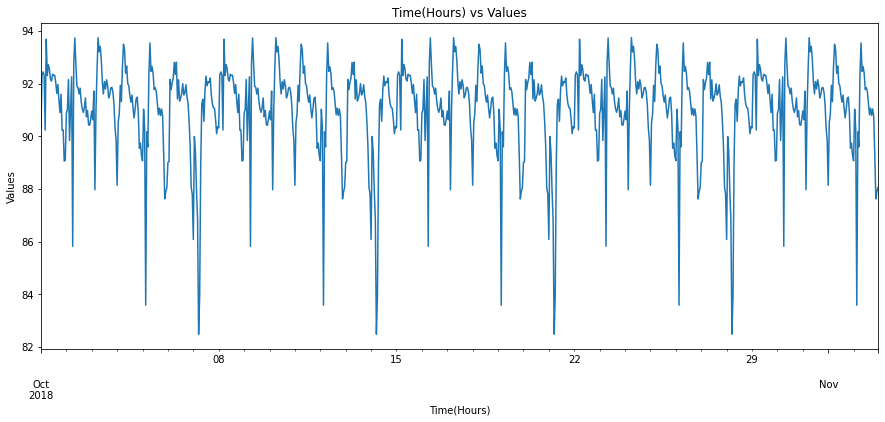


 Decomposing the Time Series Values


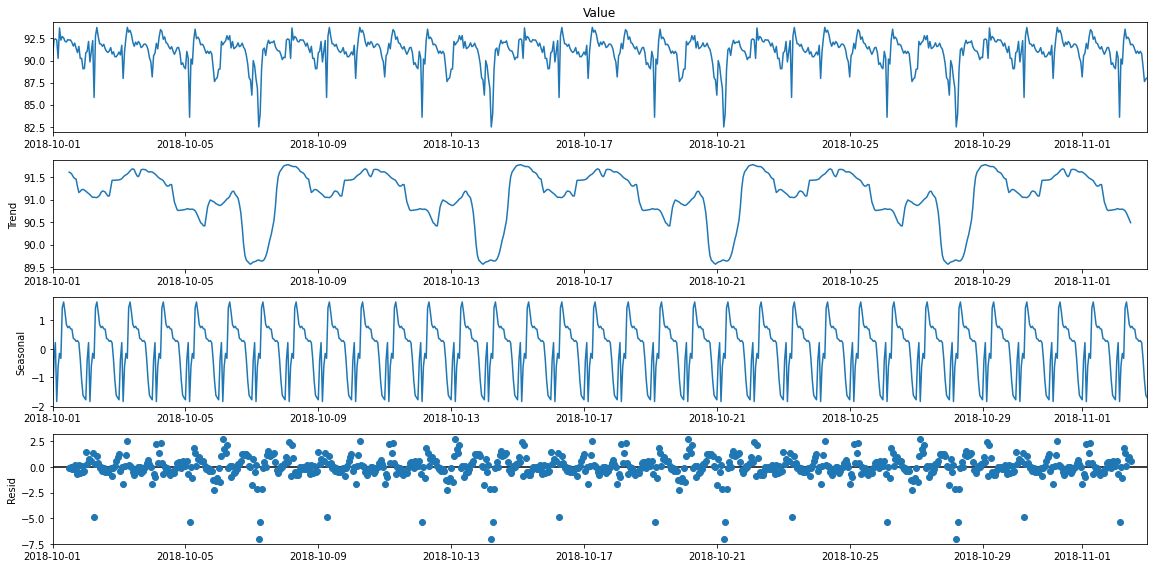

In [20]:
#Making a function to visualize the Time Series Data
def plot_vis(timeseries):
    
    #Plotting the values of the corresponding subset along the increase in Time
    print("Plotting the Values of the Network ID against Time")
    timeseries.plot(figsize =(15,6))
    plt.title("Time(Hours) vs Values")
    plt.ylabel("Values")
    plt.xlabel("Time(Hours)")
    plt.show()
    
    #We can further breakdown the time series data into thrre distinct components: Trend, Seasonality and Noise
    #using a method called Time Series Decomposition
    print("\n Decomposing the Time Series Values")
    from pylab import rcParams
    import statsmodels.api as sm
    rcParams['figure.figsize'] = 16, 8
    decomposition = sm.tsa.seasonal_decompose(timeseries, model='additive')
    fig = decomposition.plot()
    plt.show()

    
print("Visualizing the Values of the Network Id MEXGDLMSS1\n")
ne1.Value = ne1.Value.astype(float)
ts = ne1['Value']
plot_vis(ts)


I think now we can easily see the seasonality effect in our time series. In the above image, we have extracted the seasonality from the time series.

To perform forecasting using the ARIMA model, we required a stationary time series. Stationary time series is a time series that is unaffected by these four components. Most often, it happens when the data is non-stationary the predictions we get from the ARIMA model are worse or not that accurate.

If the data is not stationary, we can do one thing: either make the data stationary or use the SARIMAX model

### 1.2  Testing for Stationarity

In [21]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
        
    #Performing the Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:\n')
    dftest = adfuller(timeseries, autolag='AIC')
    print("1. ADF : ",dftest[0])
    print("2. P-Value : ", dftest[1])
    print("3. Num Of Lags : ", dftest[2])
    print("4. Num Of Observations Used For ADF Regression and Critical Values Calculation :", dftest[3])
    print("5. Critical Values :")
    for key, val in dftest[4].items():
        print("\t",key, ": ", val)
    
    
test_stationarity(ts)


Results of Dickey-Fuller Test:

1. ADF :  -5.563848375353599
2. P-Value :  1.5203782522701652e-06
3. Num Of Lags :  20
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 771
5. Critical Values :
	 1% :  -3.4388599939707056
	 5% :  -2.865295977855759
	 10% :  -2.5687700561872413


The Augumented Dicky Fuller Method is used in checking the stationarity of the datset. In the results above we can see that the p-value < 0.05, therefore we can reject the Null Hypothesis. The data does not have a time dependant strucuture and therefore is stationary

### 1.3 Auto Correlation and Partial Auto Correlation Plots

Auto correlation Plots


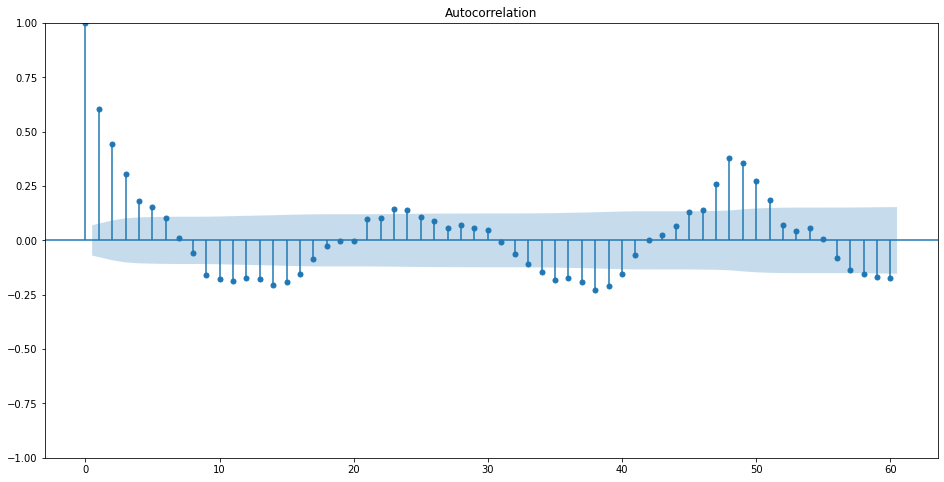

<Figure size 1080x360 with 0 Axes>

Partial Auto correlation Plots


<Figure size 1440x216 with 0 Axes>

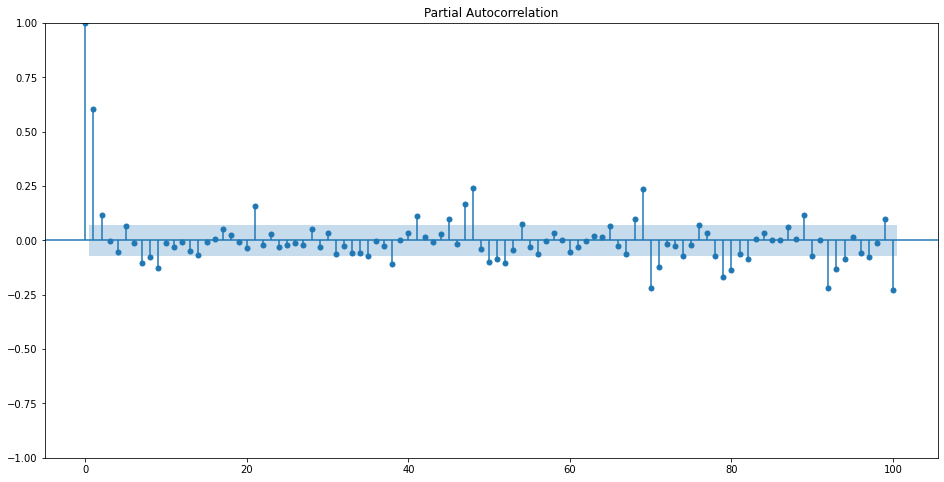

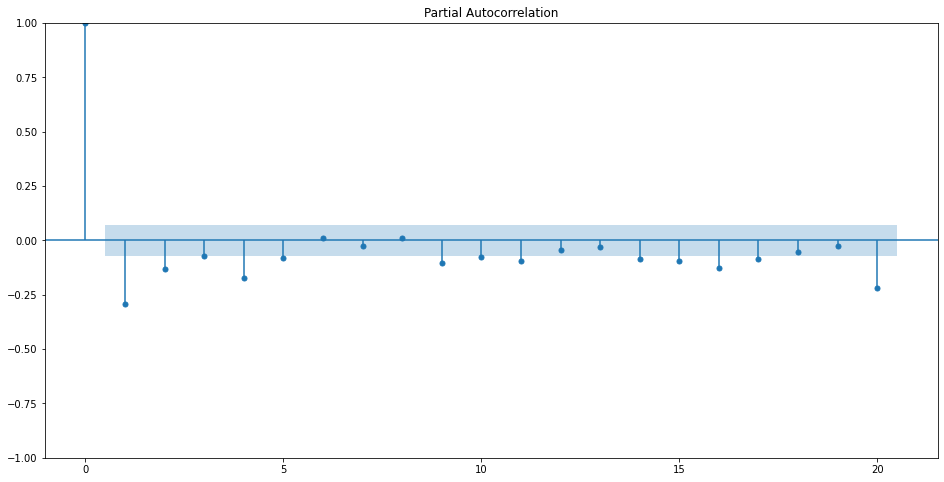

In [22]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from matplotlib.pyplot import plot

print("Auto correlation Plots")
plot_acf(ne1.Value, lags= 60)
plt.figure(figsize=(15,5))
plt.show()

#Plot after 1st order Differencing

print("Partial Auto correlation Plots")
plt.figure(figsize=(20,3))
df1f = pd.DataFrame(ne1.Value.diff(periods=1))
df1f = df1f[1:]
plot_pacf(ne1.Value, lags = 100)
plot_pacf(df1f, lags= 20)
plt.show()


### 1.4 Applying the ARIMA Model on the Dataset

In [23]:
from statsmodels.tsa.arima.model import ARIMA

model=ARIMA(ne1.Value, order=(1,0,6))
model_fit = model.fit()
#Printing out ARIMA Model Results
model_fit.summary()
#Printing AIC number related to that ARIMA Model's p,d,q
print(model_fit.aic)

/home/sol/.local/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  warnings.warn('No frequency information was'
/home/sol/.local/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  warnings.warn('No frequency information was'
/home/sol/.local/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  warnings.warn('No frequency information was'


2743.8575332935843


In [24]:
predictions = model_fit.predict(start = 633, end=792, typ = 'levels')
print(predictions)

2018-10-27 09:00:00    92.212005
2018-10-27 10:00:00    91.421276
2018-10-27 11:00:00    91.733289
2018-10-27 12:00:00    91.340292
2018-10-27 13:00:00    91.358783
                         ...    
2018-11-02 20:00:00    90.838200
2018-11-02 21:00:00    90.068535
2018-11-02 22:00:00    89.011762
2018-11-02 23:00:00    88.924605
2018-11-03 00:00:00    89.094387
Freq: H, Name: predicted_mean, Length: 160, dtype: float64


### 1.5 Actual Data vs Predicted Data Plot

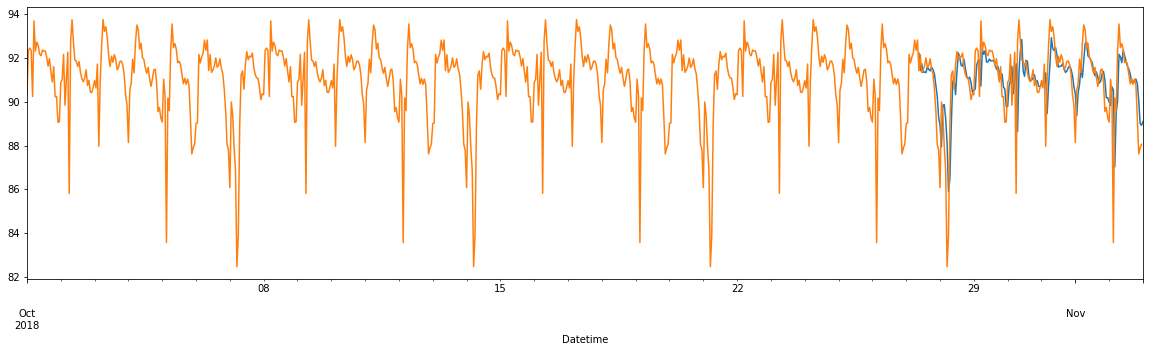

In [25]:
#Plotting the predicted values against the actual values
plt.figure(figsize=(20,5))
predictions.plot()
ne1['Value'].plot()

plt.show()

### 1.6  Forecasting the Values for the first NE-ID subset MEXTLAMSS1 for the next two days

In [26]:
#Predicting data for the next two days - 2x24= 48, so steps=48
#Forecasted Model starts at 792 and ends at 792+48=840

futureforecast = model_fit.forecast(steps=48)
print(futureforecast)

2018-11-03 00:00:00    89.094387
2018-11-03 01:00:00    89.662033
2018-11-03 02:00:00    89.886891
2018-11-03 03:00:00    90.103144
2018-11-03 04:00:00    90.354117
2018-11-03 05:00:00    90.584728
2018-11-03 06:00:00    90.792922
2018-11-03 07:00:00    90.908751
2018-11-03 08:00:00    90.973193
2018-11-03 09:00:00    91.009045
2018-11-03 10:00:00    91.028992
2018-11-03 11:00:00    91.040089
2018-11-03 12:00:00    91.046263
2018-11-03 13:00:00    91.049698
2018-11-03 14:00:00    91.051609
2018-11-03 15:00:00    91.052673
2018-11-03 16:00:00    91.053264
2018-11-03 17:00:00    91.053593
2018-11-03 18:00:00    91.053776
2018-11-03 19:00:00    91.053878
2018-11-03 20:00:00    91.053935
2018-11-03 21:00:00    91.053966
2018-11-03 22:00:00    91.053984
2018-11-03 23:00:00    91.053994
2018-11-04 00:00:00    91.053999
2018-11-04 01:00:00    91.054002
2018-11-04 02:00:00    91.054004
2018-11-04 03:00:00    91.054005
2018-11-04 04:00:00    91.054005
2018-11-04 05:00:00    91.054006
2018-11-04

### 1.7 Accuracy Metrics for the Time Series Forecast

In [27]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_error
from math import sqrt

mae = mean_absolute_error(ne1.tail(160), predictions)
print('Mean Absolute Error(MAE): %f\t' % mae)
mse = mean_squared_error(ne1.tail(160), predictions)
print('Mean Squared Error(MSE): %f\t' % mse)
rmse = sqrt(mse)
print('Root Mean Squared Error(RMSE): %f\t' % rmse)

Mean Absolute Error(MAE): 0.459293	
Mean Squared Error(MSE): 0.525699	
Root Mean Squared Error(RMSE): 0.725051	


# 2. Time Series Forecasting for the second subset NE-Id MEXTIJMSS1

In [28]:
ne2.head()

,Value
Datetime,
2018-10-01 00:00:00,94.9000
2018-10-01 01:00:00,94.7300
2018-10-01 02:00:00,95.0900
2018-10-01 03:00:00,95.4400
2018-10-01 04:00:00,94.6600


## 2.1 Visualizing the values of the Network-Id MEXTIJMSS1

Visualizing the Values of the Network Id MEXTIJMSS1

Plotting the Values of the Network ID against Time


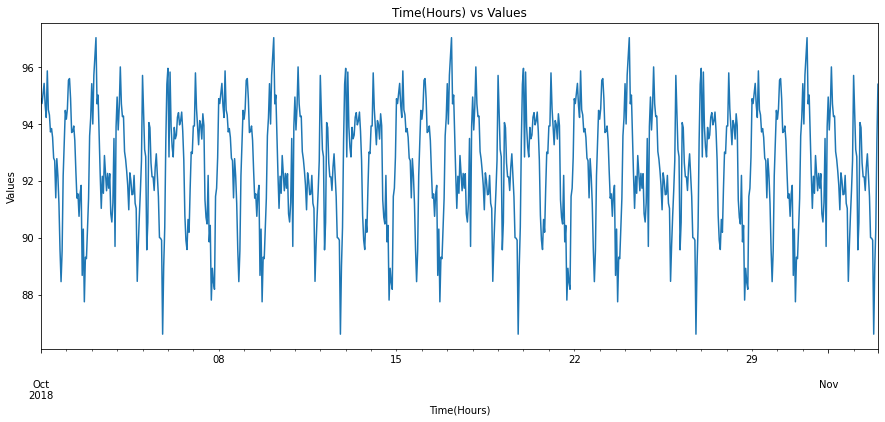


 Decomposing the Time Series Values


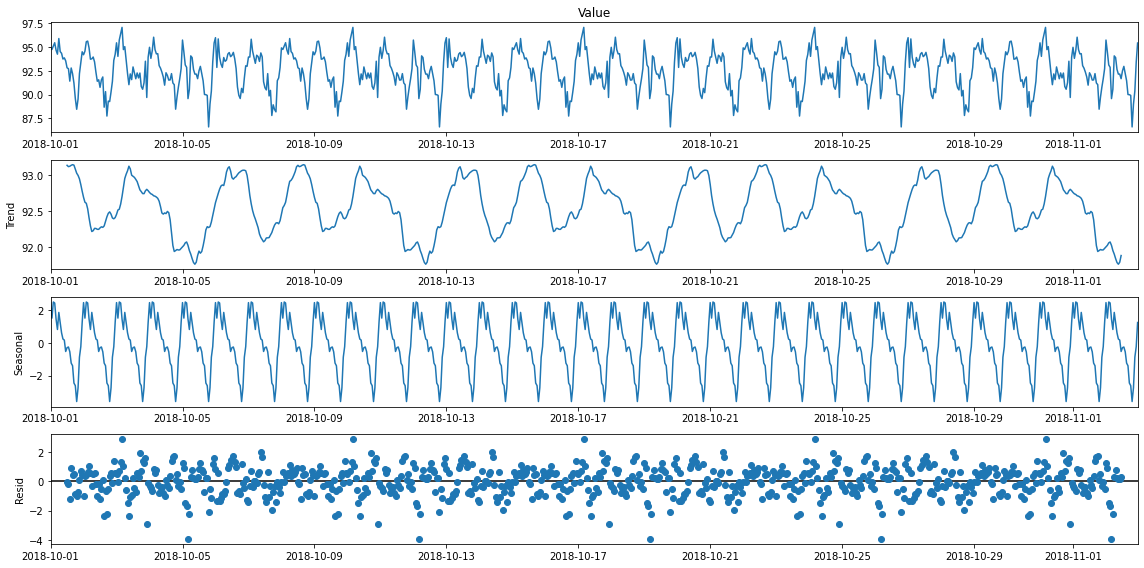

In [29]:
print("Visualizing the Values of the Network Id MEXTIJMSS1\n")
ne2.Value = ne2.Value.astype(float)
ts = ne2['Value']
plot_vis(ts)

### 2.2 Testing Stationarity of the Time Series data

In [30]:
test_stationarity(ts)

Results of Dickey-Fuller Test:

1. ADF :  -5.610046002908812
2. P-Value :  1.2093092612477061e-06
3. Num Of Lags :  20
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 771
5. Critical Values :
	 1% :  -3.4388599939707056
	 5% :  -2.865295977855759
	 10% :  -2.5687700561872413


The Augumented Dicky Fuller Method is used in checking the stationarity of the datset. In the results above we can see that the p-value < 0.05, therefore we can reject the Null Hypothesis. The data does not have a time dependant strucuture and therefore is stationary

### 2.3 Auto Correlation and Partial Auto Correlation Plots

<Figure size 1440x360 with 0 Axes>

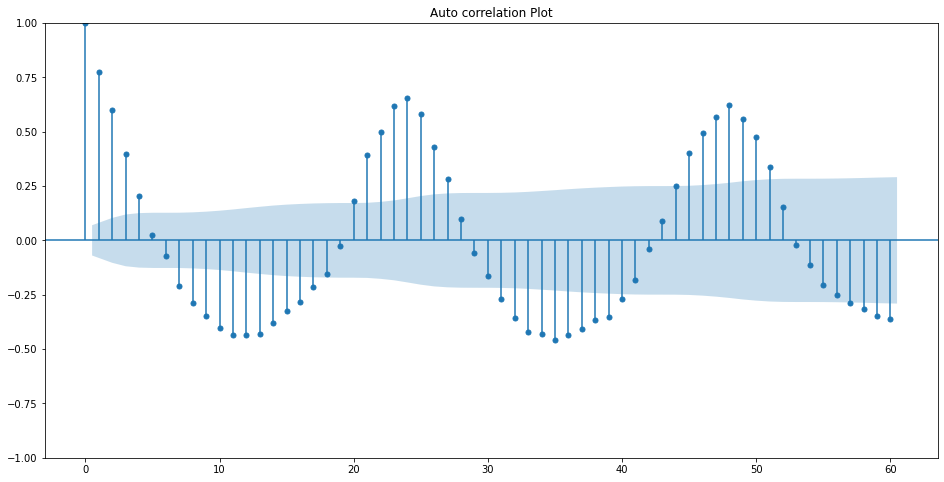

<Figure size 720x360 with 0 Axes>

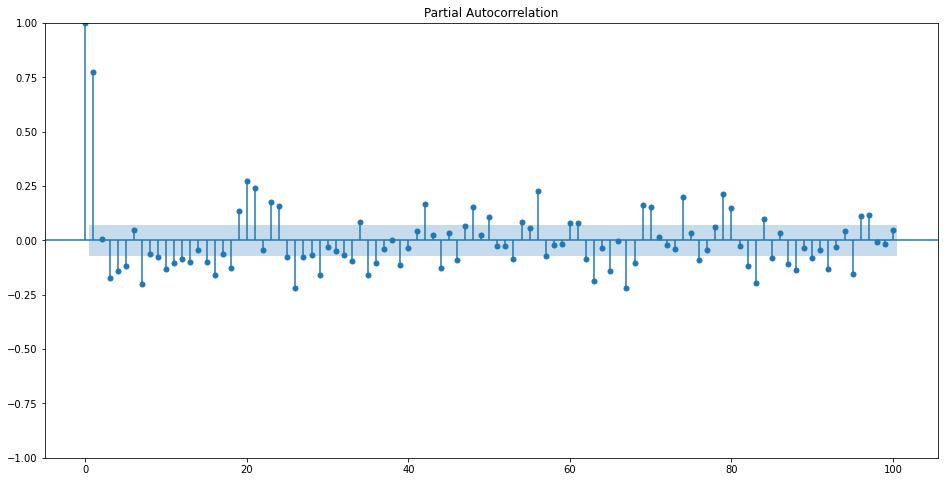

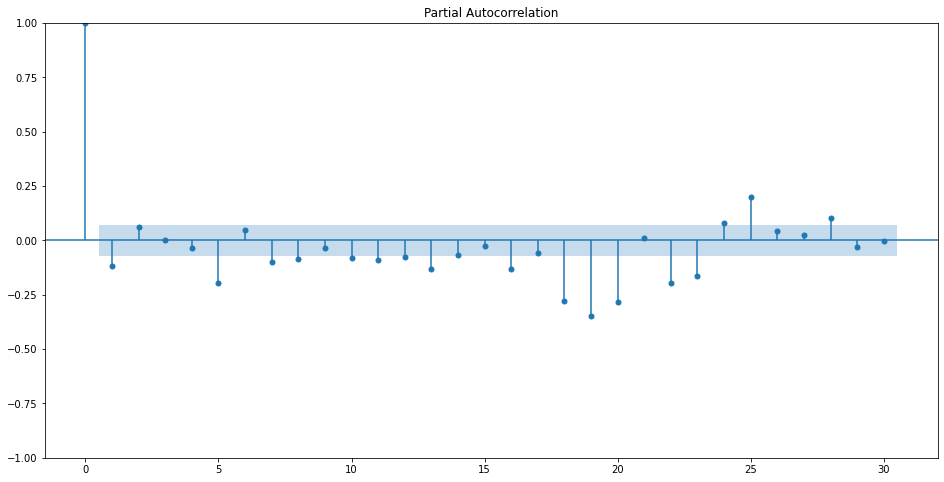

In [31]:
plt.figure(figsize=(20,5))
plot_acf(ne2.Value, lags= 60)
plt.title("Auto correlation Plot")
plt.show()

#Plot after 1st order Differencing

plt.figure(figsize=(10,5))
df1f = pd.DataFrame(ne2.Value.diff(periods=1))
df1f = df1f[1:]
plot_pacf(ne2.Value, lags = 100)
plot_pacf(df1f, lags= 30)

plt.show()

### 2.4 Applying the ARIMA Model on the Dataset

Like the previous dataset, we tried finding the lowest AIC value for various p,d,q combinations and we found (2,0,2) to have the lowest AIC value of them all so taking p,d,q = (2,0,2) in our model on th train dataset

In [32]:
model=ARIMA(ne2.Value, order=(1,0,4))
model_fit = model.fit()
#Printing out ARIMA Model Results
model_fit.summary()
#Printing AIC number related to that ARIMA Model's p,d,q
print(model_fit.aic)

/home/sol/.local/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  warnings.warn('No frequency information was'
/home/sol/.local/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  warnings.warn('No frequency information was'
/home/sol/.local/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  warnings.warn('No frequency information was'


2620.4852572210766


In [33]:
predictions = model_fit.predict(start = 633, end=792, typ = 'levels')
print(predictions)

2018-10-27 09:00:00    93.438886
2018-10-27 10:00:00    93.879472
2018-10-27 11:00:00    93.966239
2018-10-27 12:00:00    93.656817
2018-10-27 13:00:00    93.680335
                         ...    
2018-11-02 20:00:00    88.159024
2018-11-02 21:00:00    89.611482
2018-11-02 22:00:00    91.051804
2018-11-02 23:00:00    93.577320
2018-11-03 00:00:00    95.565753
Freq: H, Name: predicted_mean, Length: 160, dtype: float64


### 2.5 Actual Data vs Predicted Data Plot

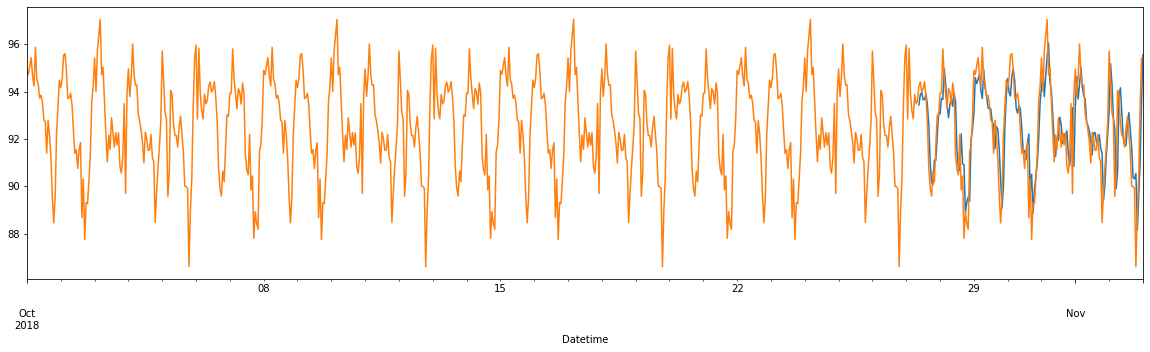

In [34]:
#Plotting the predicted values against the actual values
plt.figure(figsize=(20,5))
predictions.plot()
ne2['Value'].plot()

plt.show()

### 2.6  Forecasting the Values for the second NE-ID subset MEXTIJMSS1 for the next two days

In [35]:
#Predicting data for the next two days - 2x24= 48, so steps=48
#Forecasted Model starts at 792 and ends at 792+48=840

futureforecast = model_fit.forecast(steps=48)
print(futureforecast)

2018-11-03 00:00:00    95.565753
2018-11-03 01:00:00    95.291890
2018-11-03 02:00:00    94.618072
2018-11-03 03:00:00    93.788632
2018-11-03 04:00:00    93.144605
2018-11-03 05:00:00    92.841605
2018-11-03 06:00:00    92.699050
2018-11-03 07:00:00    92.631982
2018-11-03 08:00:00    92.600427
2018-11-03 09:00:00    92.585581
2018-11-03 10:00:00    92.578597
2018-11-03 11:00:00    92.575311
2018-11-03 12:00:00    92.573765
2018-11-03 13:00:00    92.573037
2018-11-03 14:00:00    92.572695
2018-11-03 15:00:00    92.572534
2018-11-03 16:00:00    92.572458
2018-11-03 17:00:00    92.572423
2018-11-03 18:00:00    92.572406
2018-11-03 19:00:00    92.572398
2018-11-03 20:00:00    92.572394
2018-11-03 21:00:00    92.572393
2018-11-03 22:00:00    92.572392
2018-11-03 23:00:00    92.572391
2018-11-04 00:00:00    92.572391
2018-11-04 01:00:00    92.572391
2018-11-04 02:00:00    92.572391
2018-11-04 03:00:00    92.572391
2018-11-04 04:00:00    92.572391
2018-11-04 05:00:00    92.572391
2018-11-04

### 2.7 Accuracy Metrics for the Time Series Forecast

In [36]:
mae = mean_absolute_error(ne2.tail(160), predictions)
print('Mean Absolute Error(MAE): %f\t' % mae)
mse = mean_squared_error(ne2.tail(160), predictions)
print('Mean Squared Error(MSE): %f\t' % mse)
rmse = sqrt(mse)
print('Root Mean Squared Error(RMSE): %f\t' % rmse)

Mean Absolute Error(MAE): 0.409355	
Mean Squared Error(MSE): 0.254991	
Root Mean Squared Error(RMSE): 0.504967	


## 3. Time Series Forecasting for the third subset, NE-Id MEXMTYMSS1

In [37]:
ne3.head()

,Value
Datetime,
2018-10-01 00:00:00,90.3400
2018-10-01 01:00:00,91.5700
2018-10-01 02:00:00,91.1500
2018-10-01 03:00:00,91.6700
2018-10-01 04:00:00,92.4900


### 3.1 Visualizing Network Id MEXMTYMSS1

Visualizing the Values of the Network Id MEXMTYMSS1

Plotting the Values of the Network ID against Time


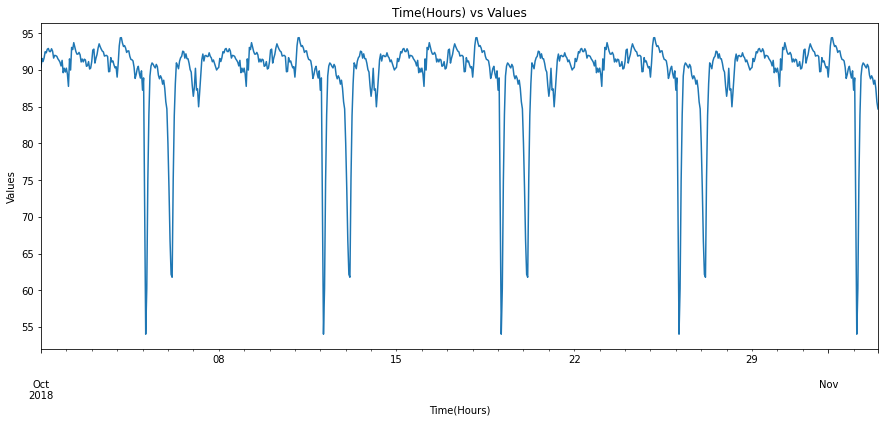


 Decomposing the Time Series Values


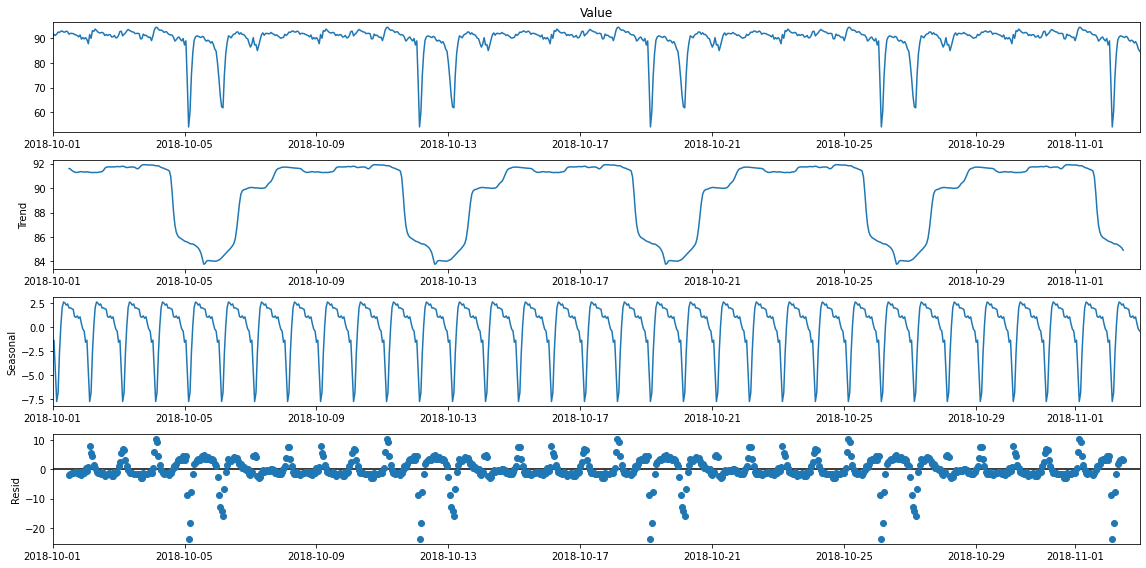

In [38]:
print("Visualizing the Values of the Network Id MEXMTYMSS1\n")
ne3.Value = ne3.Value.astype(float)
ts = ne3['Value']
plot_vis(ts)

### 3.2  Testing for Stationarity

In [39]:
test_stationarity(ts)

Results of Dickey-Fuller Test:

1. ADF :  -3.1036096758667804
2. P-Value :  0.026287207028795126
3. Num Of Lags :  21
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 770
5. Critical Values :
	 1% :  -3.4388710830827125
	 5% :  -2.8653008652386576
	 10% :  -2.568772659807725


The Augumented Dicky Fuller Method is used in checking the stationarity of the datset. In the results above we can see that the p-value < 0.05, therefore we can reject the Null Hypothesis. The data does not have a time dependant strucuture and therefore is stationary

### 3.3 Auto Correlation and Partial Auto Correlation Plots

<Figure size 1440x360 with 0 Axes>

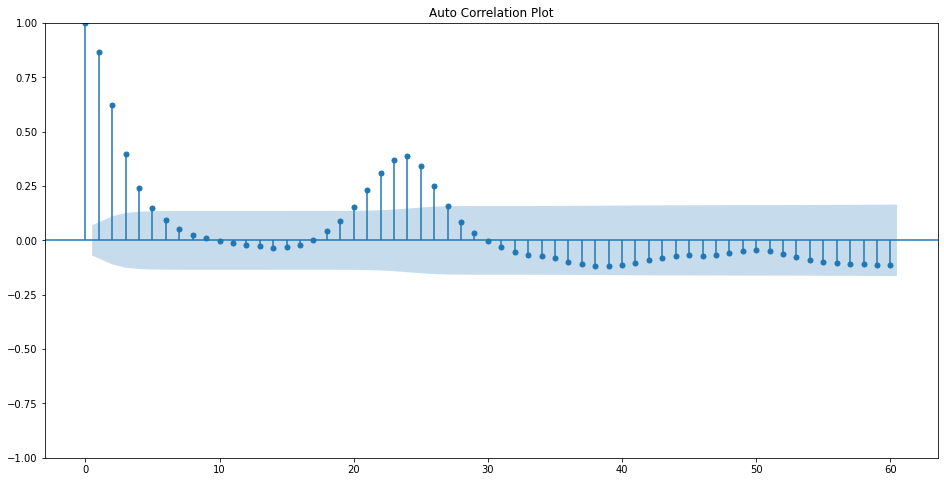

<Figure size 720x360 with 0 Axes>

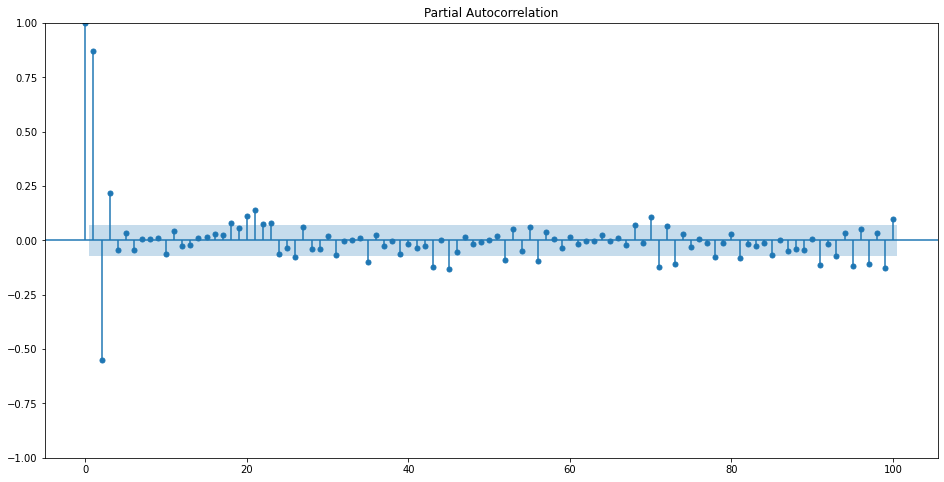

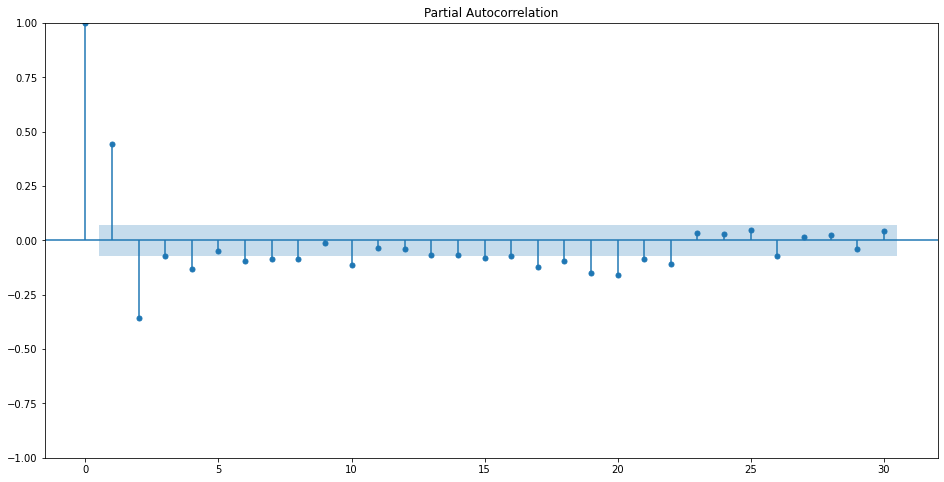

In [40]:
plt.figure(figsize=(20,5))

plot_acf(ne3.Value, lags= 60)
plt.title("Auto Correlation Plot")
plt.show()

#Plot after 1st order Differencing

plt.figure(figsize=(10,5))
df1f = pd.DataFrame(ne3.Value.diff(periods=1))
df1f = df1f[1:]
plot_pacf(ne3.Value, lags = 100)
plot_pacf(df1f, lags= 30)

plt.show()

### 3.4 Applying the ARIMA Model on the Dataset

In [41]:
model=ARIMA(ne3.Value, order=(3,0,6))
model_fit = model.fit()
#Printing out ARIMA Model Results
model_fit.summary()
#Printing AIC number related to that ARIMA Model's p,d,q
print(model_fit.aic)

/home/sol/.local/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  warnings.warn('No frequency information was'
/home/sol/.local/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  warnings.warn('No frequency information was'
/home/sol/.local/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  warnings.warn('No frequency information was'


3647.17146273724


/home/sol/.local/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [42]:
predictions = model_fit.predict(start = 633, end=792, typ = 'levels')
print(predictions)

2018-10-27 09:00:00    91.122126
2018-10-27 10:00:00    89.972529
2018-10-27 11:00:00    90.083585
2018-10-27 12:00:00    91.736281
2018-10-27 13:00:00    91.007152
                         ...    
2018-11-02 20:00:00    87.856606
2018-11-02 21:00:00    89.233787
2018-11-02 22:00:00    87.090842
2018-11-02 23:00:00    85.454223
2018-11-03 00:00:00    85.195158
Freq: H, Name: predicted_mean, Length: 160, dtype: float64


### 3.5 Actual Data vs Predicted Data Plot

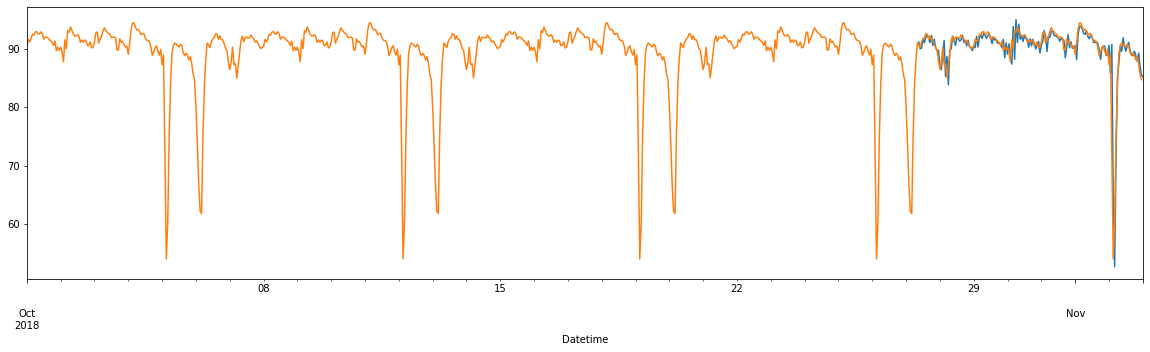

In [43]:
#Plotting the predicted values against the actual values
plt.figure(figsize=(20,5))
predictions.plot()
ne3['Value'].plot()
plt.show()

### 3.6  Forecasting the Values for the first NE-ID subset MEXMTYMSS1 for the next two days

In [44]:
#Predicting data for the next two days - 2x24= 48, so steps=48
#Forecasted Model starts at 792 and ends at 792+48=840

futureforecast = model_fit.forecast(steps=48)
print(futureforecast)

2018-11-03 00:00:00    85.195158
2018-11-03 01:00:00    86.459819
2018-11-03 02:00:00    87.666852
2018-11-03 03:00:00    88.477019
2018-11-03 04:00:00    88.828209
2018-11-03 05:00:00    89.108411
2018-11-03 06:00:00    89.314924
2018-11-03 07:00:00    89.413492
2018-11-03 08:00:00    89.503946
2018-11-03 09:00:00    89.569604
2018-11-03 10:00:00    89.595530
2018-11-03 11:00:00    89.625762
2018-11-03 12:00:00    89.646590
2018-11-03 13:00:00    89.652569
2018-11-03 14:00:00    89.663168
2018-11-03 15:00:00    89.669689
2018-11-03 16:00:00    89.670642
2018-11-03 17:00:00    89.674581
2018-11-03 18:00:00    89.676551
2018-11-03 19:00:00    89.676463
2018-11-03 20:00:00    89.678018
2018-11-03 21:00:00    89.678566
2018-11-03 22:00:00    89.678379
2018-11-03 23:00:00    89.679027
2018-11-04 00:00:00    89.679149
2018-11-04 01:00:00    89.679028
2018-11-04 02:00:00    89.679309
2018-11-04 03:00:00    89.679316
2018-11-04 04:00:00    89.679255
2018-11-04 05:00:00    89.679380
2018-11-04

### 3.7 Accuracy Metrics for the Time Series Forecast

In [45]:
mae = mean_absolute_error(ne3.tail(160), predictions)
print('Mean Absolute Error(MAE): %f\t' % mae)
mse = mean_squared_error(ne1.tail(160), predictions)
print('Mean Squared Error(MSE): %f\t' % mse)
rmse = sqrt(mse)
print('Root Mean Squared Error(RMSE): %f\t' % rmse)

Mean Absolute Error(MAE): 0.796625	
Mean Squared Error(MSE): 14.828025	
Root Mean Squared Error(RMSE): 3.850718	


# 4. Time Series Forecasting for the fourth subset, NE-Id -  MEXMTYMSS2

In [46]:
ne4.head()

,Value
Datetime,
2018-10-01 00:00:00,92.8500
2018-10-01 01:00:00,91.2200
2018-10-01 02:00:00,92.7100
2018-10-01 03:00:00,94.7600
2018-10-01 04:00:00,97.4000


### 4.1 Visualizing Network Id MEXMTYMSS2

Visualizing the Values of the Network Id MEXGDLMSS1

Plotting the Values of the Network ID against Time


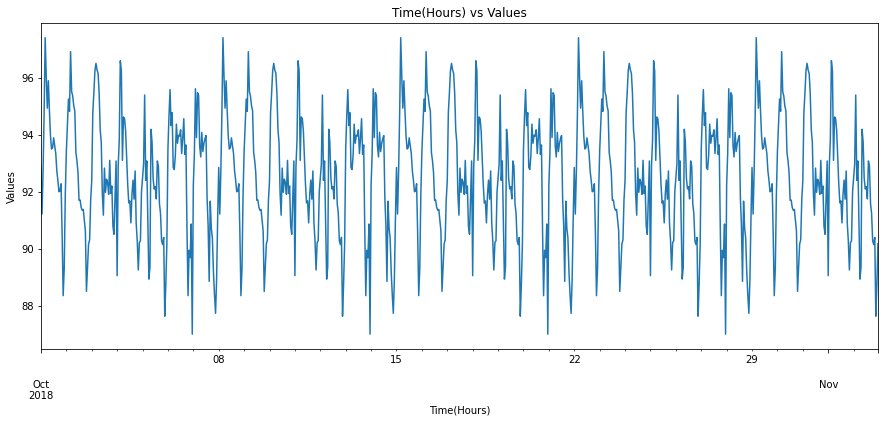


 Decomposing the Time Series Values


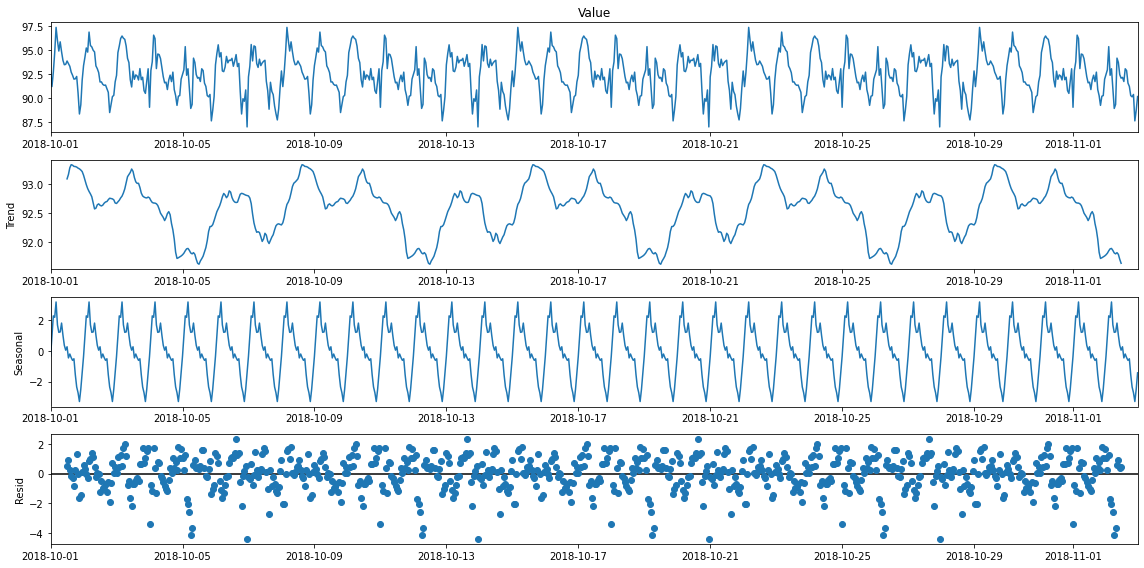

In [47]:
print("Visualizing the Values of the Network Id MEXGDLMSS1\n")
ne4.Value = ne4.Value.astype(float)
ts = ne4['Value']
plot_vis(ts)

### 4.2  Testing for Stationarity

In [48]:
test_stationarity(ts)


Results of Dickey-Fuller Test:

1. ADF :  -4.788697151350788
2. P-Value :  5.715928821339414e-05
3. Num Of Lags :  21
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 770
5. Critical Values :
	 1% :  -3.4388710830827125
	 5% :  -2.8653008652386576
	 10% :  -2.568772659807725


### 4.3 Auto Correlation and Partial Auto Correlation Plots

Auto correlation Plots


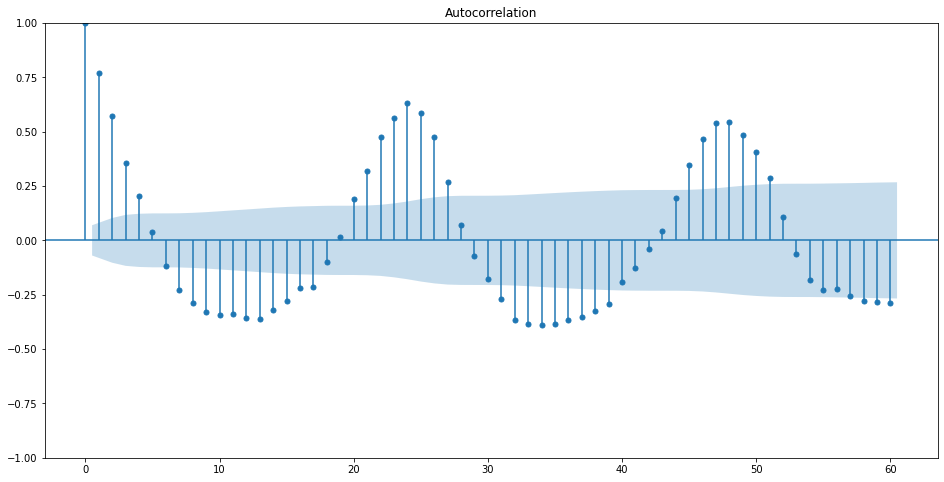

<Figure size 1080x360 with 0 Axes>

Partial Auto correlation Plots


<Figure size 1440x216 with 0 Axes>

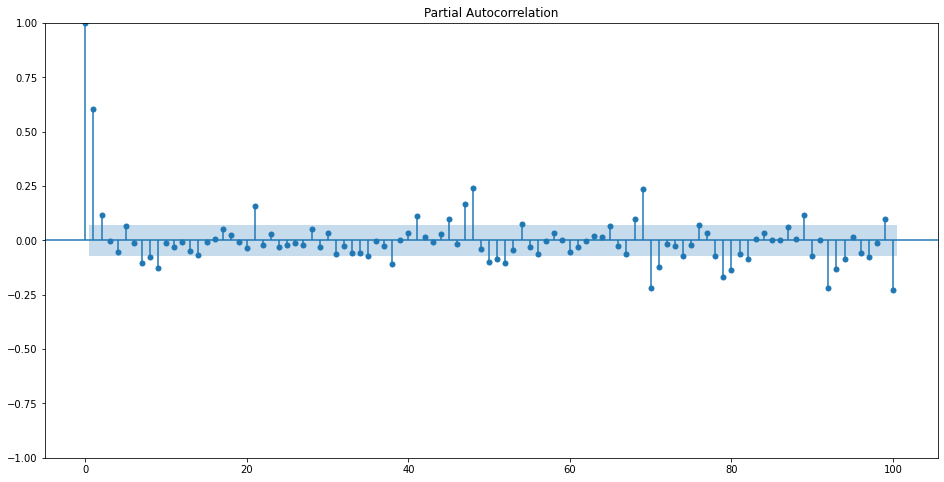

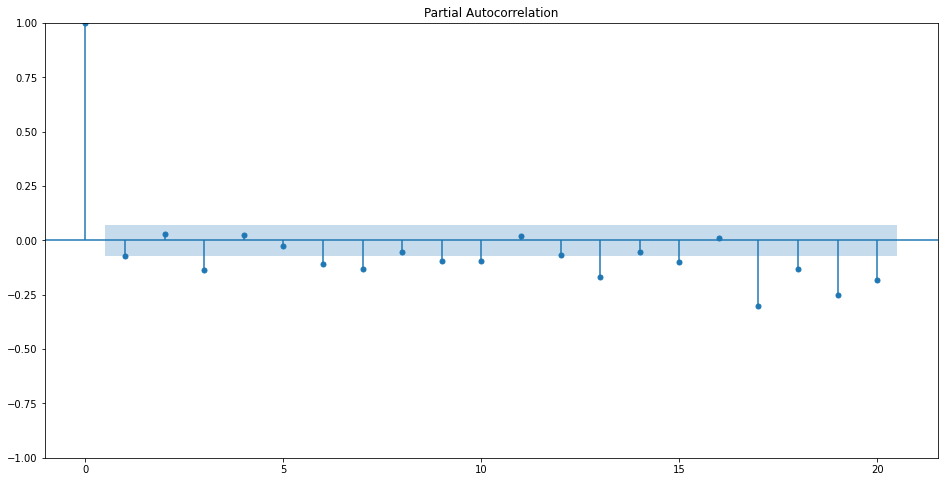

In [49]:
print("Auto correlation Plots")
plot_acf(ne4.Value, lags= 60)
plt.figure(figsize=(15,5))
plt.show()

#Plot after 1st order Differencing

print("Partial Auto correlation Plots")

plt.figure(figsize=(20,3))
df1f = pd.DataFrame(ne4.Value.diff(periods=1))
df1f = df1f[1:]
plot_pacf(ne1.Value, lags = 100)
plot_pacf(df1f, lags= 20)
plt.show()

### 4.4 Applying ARIMA Model on the Dataset

Like the first dataset(df1), we tried finding the lowest AIC value for various p,d,q combinations and we found (3,0,2) to have the lowest AIC value of them all so taking p,d,q = (3,0,2) in our model on the train dataset

In [50]:
model=ARIMA(ne1.Value, order=(1,0,6))
model_fit = model.fit()
#Printing out ARIMA Model Results
model_fit.summary()
#Printing AIC number related to that ARIMA Model's p,d,q
print(model_fit.aic)

/home/sol/.local/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  warnings.warn('No frequency information was'
/home/sol/.local/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  warnings.warn('No frequency information was'
/home/sol/.local/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  warnings.warn('No frequency information was'


2743.8575332935843


In [51]:
predictions = model_fit.predict(start = 633, end=792, typ = 'levels')
print(predictions)

2018-10-27 09:00:00    92.212005
2018-10-27 10:00:00    91.421276
2018-10-27 11:00:00    91.733289
2018-10-27 12:00:00    91.340292
2018-10-27 13:00:00    91.358783
                         ...    
2018-11-02 20:00:00    90.838200
2018-11-02 21:00:00    90.068535
2018-11-02 22:00:00    89.011762
2018-11-02 23:00:00    88.924605
2018-11-03 00:00:00    89.094387
Freq: H, Name: predicted_mean, Length: 160, dtype: float64


### 4.5 Actual Data vs Predicted Data Plot

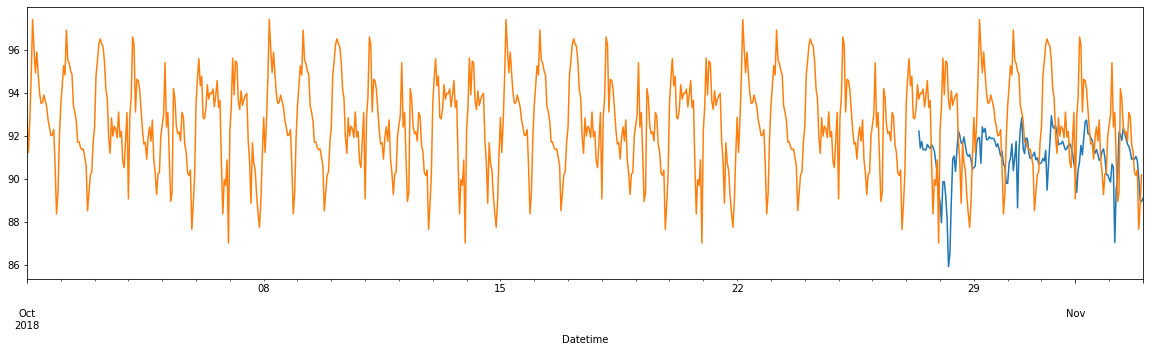

In [52]:
plt.figure(figsize=(20,5))

predictions.plot()
ne4['Value'].plot()

plt.show()

### 4.6  Forecasting the Values for the fourth NE-ID subset MEXMTYMSS2 for the next two days

In [53]:
#Predicting data for the next two days - 2x24= 48, so steps=48
#Forecasted Model starts at 792 and ends at 792+48=840

futureforecast = model_fit.forecast(steps=48)
print(futureforecast)

2018-11-03 00:00:00    89.094387
2018-11-03 01:00:00    89.662033
2018-11-03 02:00:00    89.886891
2018-11-03 03:00:00    90.103144
2018-11-03 04:00:00    90.354117
2018-11-03 05:00:00    90.584728
2018-11-03 06:00:00    90.792922
2018-11-03 07:00:00    90.908751
2018-11-03 08:00:00    90.973193
2018-11-03 09:00:00    91.009045
2018-11-03 10:00:00    91.028992
2018-11-03 11:00:00    91.040089
2018-11-03 12:00:00    91.046263
2018-11-03 13:00:00    91.049698
2018-11-03 14:00:00    91.051609
2018-11-03 15:00:00    91.052673
2018-11-03 16:00:00    91.053264
2018-11-03 17:00:00    91.053593
2018-11-03 18:00:00    91.053776
2018-11-03 19:00:00    91.053878
2018-11-03 20:00:00    91.053935
2018-11-03 21:00:00    91.053966
2018-11-03 22:00:00    91.053984
2018-11-03 23:00:00    91.053994
2018-11-04 00:00:00    91.053999
2018-11-04 01:00:00    91.054002
2018-11-04 02:00:00    91.054004
2018-11-04 03:00:00    91.054005
2018-11-04 04:00:00    91.054005
2018-11-04 05:00:00    91.054006
2018-11-04

### 4.7 Accuracy Metrics for the Time Series Forecast

In [54]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_error
from math import sqrt

mae = mean_absolute_error(ne1.tail(160), predictions)
print('Mean Absolute Error(MAE): %f\t' % mae)
mse = mean_squared_error(ne1.tail(160), predictions)
print('Mean Squared Error(MSE): %f\t' % mse)
rmse = sqrt(mse)
print('Root Mean Squared Error(RMSE): %f\t' % rmse)

Mean Absolute Error(MAE): 0.459293	
Mean Squared Error(MSE): 0.525699	
Root Mean Squared Error(RMSE): 0.725051	


# Time Series Forecasting for the fifth subset, NE-ID - MEXGDLMSS1

In [55]:
ne5.head()

,Value
Datetime,
2018-10-01 00:00:00,90.1700
2018-10-01 01:00:00,90.2400
2018-10-01 02:00:00,91.1300
2018-10-01 03:00:00,91.9600
2018-10-01 04:00:00,92.1800


### 5.1 Visualizing Network Id MEXGDLMSS1

Visualizing the Values of the Network Id MEXGDLMSS1

Plotting the Values of the Network ID against Time


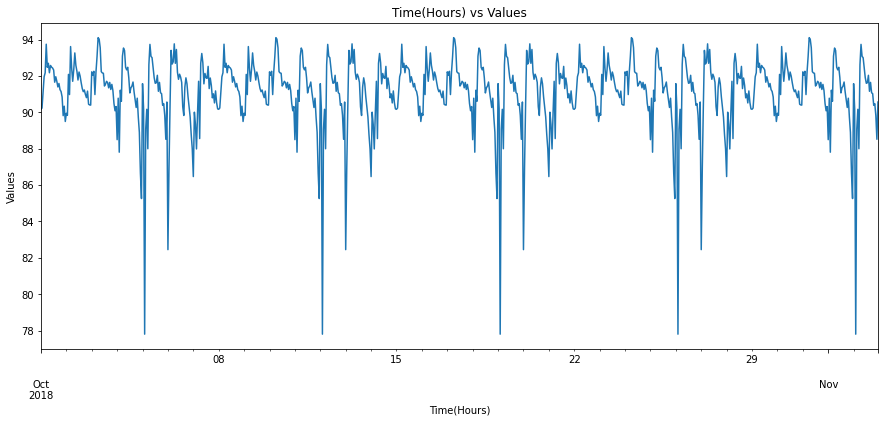


 Decomposing the Time Series Values


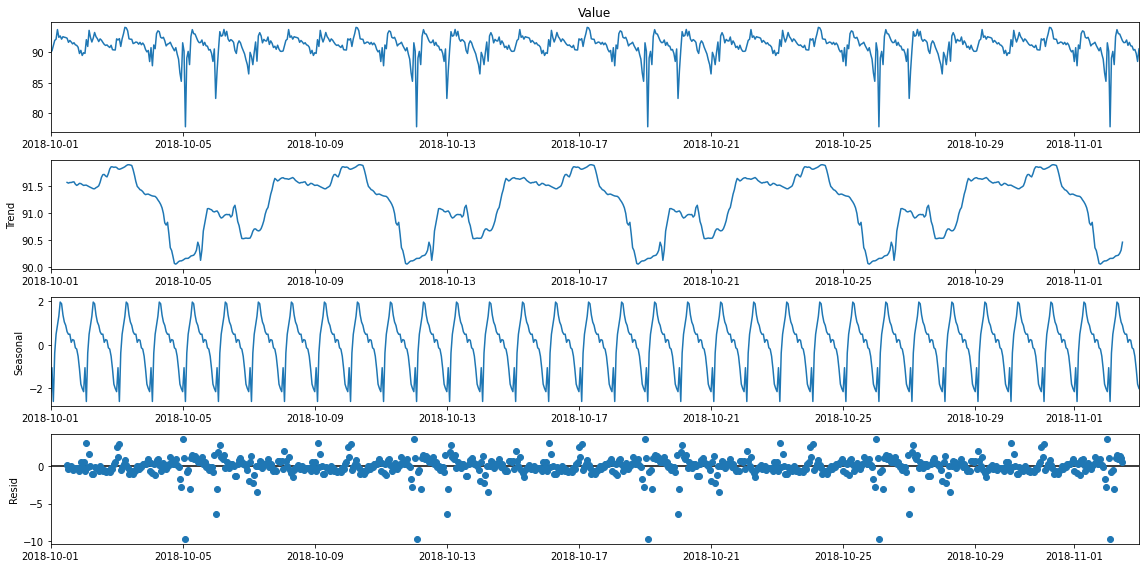

In [56]:
print("Visualizing the Values of the Network Id MEXGDLMSS1\n")
ne5.Value = ne5.Value.astype(float)
ts = ne5['Value']
plot_vis(ts)


### 5.2  Testing for Stationarity

In [57]:
test_stationarity(ts)

Results of Dickey-Fuller Test:

1. ADF :  -3.551984299882211
2. P-Value :  0.006748189210148309
3. Num Of Lags :  21
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 770
5. Critical Values :
	 1% :  -3.4388710830827125
	 5% :  -2.8653008652386576
	 10% :  -2.568772659807725


### 5.3 Auto Correlation and Partial Auto Correlation Plots

Auto correlation Plots


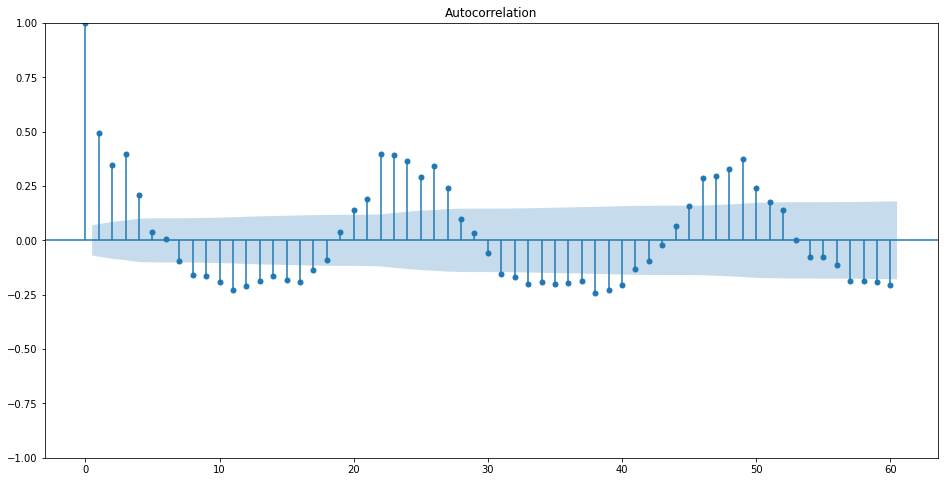

<Figure size 1080x360 with 0 Axes>

Partial Auto correlation Plots


<Figure size 1440x216 with 0 Axes>

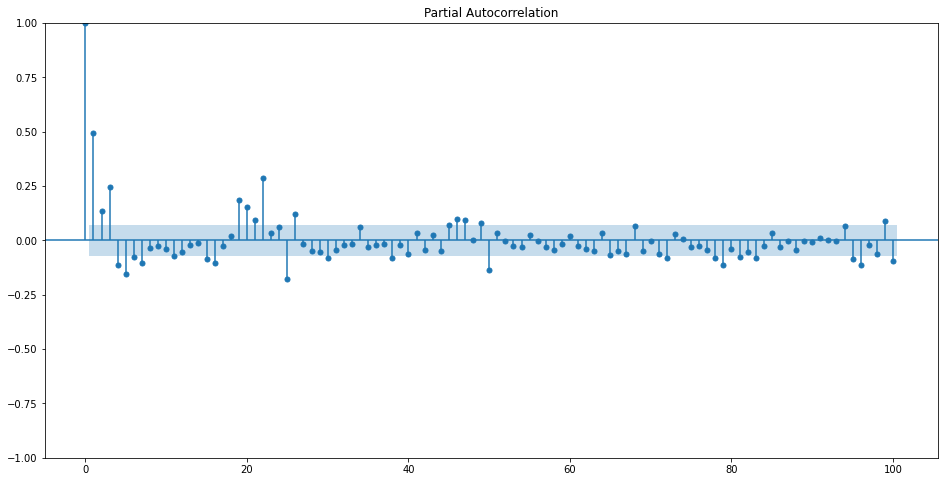

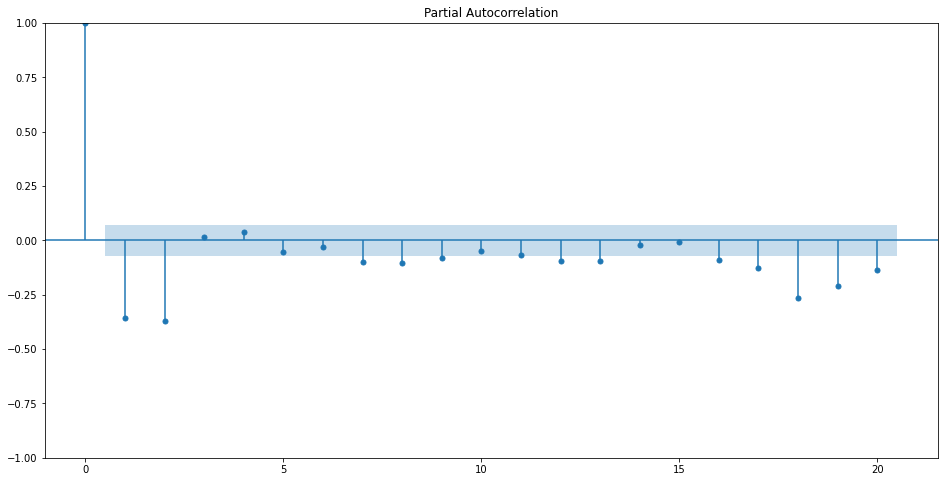

In [58]:
print("Auto correlation Plots")
plot_acf(ne5.Value, lags= 60)
plt.figure(figsize=(15,5))
plt.show()

#Plot after 1st order Differencing

print("Partial Auto correlation Plots")

plt.figure(figsize=(20,3))
df1f = pd.DataFrame(ne5.Value.diff(periods=1))
df1f = df1f[1:]
plot_pacf(ne5.Value, lags = 100)
plot_pacf(df1f, lags= 20)
plt.show()


### 5.4 Applying the ARIMA Model on the Dataset

In [59]:
model=ARIMA(ne5.Value, order=(1,0,6))
model_fit = model.fit()
#Printing out ARIMA Model Results
model_fit.summary()
#Printing AIC number related to that ARIMA Model's p,d,q
print(model_fit.aic)

/home/sol/.local/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  warnings.warn('No frequency information was'
/home/sol/.local/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  warnings.warn('No frequency information was'
/home/sol/.local/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  warnings.warn('No frequency information was'


2979.1410401902567


/home/sol/.local/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [60]:
predictions = model_fit.predict(start = 633, end=792, typ = 'levels')
print(predictions)

2018-10-27 09:00:00    91.955273
2018-10-27 10:00:00    91.597038
2018-10-27 11:00:00    92.054179
2018-10-27 12:00:00    91.945077
2018-10-27 13:00:00    91.549079
                         ...    
2018-11-02 20:00:00    90.781695
2018-11-02 21:00:00    90.826078
2018-11-02 22:00:00    90.473732
2018-11-02 23:00:00    90.006095
2018-11-03 00:00:00    90.641331
Freq: H, Name: predicted_mean, Length: 160, dtype: float64


### 5.5 Actual Data vs Predicted Data Plot

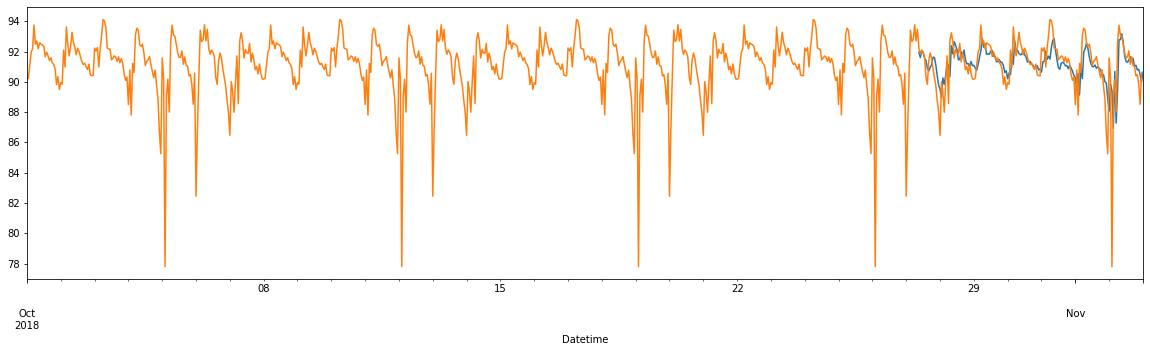

In [61]:
#Plotting the predicted values against the actual values

plt.figure(figsize=(20,5))
predictions.plot()
ne5['Value'].plot()
plt.show()

### 5.6  Forecasting the Values for the fifth NE-ID subset MEXTLAMSS2 for the next two days

In [62]:
#Predicting data for the next two days - 2x24= 48, so steps=48
#Forecasted Model starts at 792 and ends at 792+48=840

futureforecast = model_fit.forecast(steps=48)
print(futureforecast)

2018-11-03 00:00:00    90.641331
2018-11-03 01:00:00    90.418867
2018-11-03 02:00:00    91.041936
2018-11-03 03:00:00    91.461230
2018-11-03 04:00:00    91.422817
2018-11-03 05:00:00    91.385499
2018-11-03 06:00:00    91.377829
2018-11-03 07:00:00    91.370414
2018-11-03 08:00:00    91.363245
2018-11-03 09:00:00    91.356315
2018-11-03 10:00:00    91.349615
2018-11-03 11:00:00    91.343138
2018-11-03 12:00:00    91.336876
2018-11-03 13:00:00    91.330823
2018-11-03 14:00:00    91.324970
2018-11-03 15:00:00    91.319313
2018-11-03 16:00:00    91.313843
2018-11-03 17:00:00    91.308555
2018-11-03 18:00:00    91.303443
2018-11-03 19:00:00    91.298501
2018-11-03 20:00:00    91.293724
2018-11-03 21:00:00    91.289105
2018-11-03 22:00:00    91.284640
2018-11-03 23:00:00    91.280323
2018-11-04 00:00:00    91.276149
2018-11-04 01:00:00    91.272115
2018-11-04 02:00:00    91.268214
2018-11-04 03:00:00    91.264444
2018-11-04 04:00:00    91.260798
2018-11-04 05:00:00    91.257274
2018-11-04

### 5.7 Accuracy Metrics for the Time Series Forecast

In [63]:
mae = mean_absolute_error(ne1.tail(160), predictions)
print('Mean Absolute Error(MAE): %f\t' % mae)
mse = mean_squared_error(ne1.tail(160), predictions)
print('Mean Squared Error(MSE): %f\t' % mse)
rmse = sqrt(mse)
print('Root Mean Squared Error(RMSE): %f\t' % rmse)

Mean Absolute Error(MAE): 0.935491	
Mean Squared Error(MSE): 2.430524	
Root Mean Squared Error(RMSE): 1.559014	
